In [1]:
import numpy as np
import pandas as pd

In [2]:
Pruduct = pd.read_csv('C:\\Users\\USER\\Desktop\\Dynamic pricing\\Pruduct.csv',encoding='UTF-8')


C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Master = pd.read_csv('C:\\Users\\USER\\Desktop\\Dynamic pricing\\Master.csv',encoding='UTF-8')
Search1 = pd.read_csv('C:\\Users\\USER\\Desktop\\Dynamic pricing\\Search1.csv',encoding='UTF-8')
Search2 = pd.read_csv('C:\\Users\\USER\\Desktop\\Dynamic pricing\\Search2.csv',encoding='UTF-8')
Session = pd.read_csv('C:\\Users\\USER\\Desktop\\Dynamic pricing\\Session.csv',encoding='UTF-8')
Custom = pd.read_csv('C:\\Users\\USER\\Desktop\\Dynamic pricing\\Custom.csv',encoding='UTF-8')


In [4]:
# 브랜드 이름에서 [],() 기호 제거.
import re
Pruduct['PD_BRA_NM'] = list(map(lambda x:re.sub("[[,\](,)\s]", "",x),Pruduct['PD_BRA_NM']))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Possible nested set at position 1
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#구매가격 변수를 str -> int 변환.
Pruduct['PD_BUY_AM'] = list(map(lambda x:x.replace(",",""),Pruduct['PD_BUY_AM']))
Pruduct['PD_BUY_AM'] = Pruduct['PD_BUY_AM'].astype(int)

In [6]:
# 구매개수 변수를 str&int -> int로 변환.
Pruduct['PD_BUY_CT'] = Pruduct['PD_BUY_CT'].astype(str)
Pruduct['PD_BUY_CT'] = list(map(lambda x:x.replace(",",""),Pruduct['PD_BUY_CT']))
Pruduct['PD_BUY_CT'] = Pruduct['PD_BUY_CT'].astype(int)

In [7]:
# SESS_DT을 월, 주, 요일로 변환. 
Session['SESS_DT.str'] = Session['SESS_DT'].astype(str) # int object is not subsriptable 
Session['SESS_DT.str'] = list(map(lambda x:x[0:4] +'-'+x[4:6]+'-'+x[6:8],Session['SESS_DT.str']))
Session['MONTH'] = list(map(lambda x:x[5:7],Session['SESS_DT.str']))

In [19]:
## 월요일을 기준으로 2018-04-02은  04-02 ~ 04-08에 해당. 
#import datetime
#Session['WEEK'] = list(map(lambda x:datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%U-1'),Session['SESS_DT'])) 
#Session['WEEK'] = list(map(lambda x:datetime.strptime(x, '%Y-%U-%w').strftime('%Y-%m-%d'),Session['WEEK'])) 

AttributeError: module 'datetime' has no attribute 'strptime'

In [ ]:
## 0 = 월요일, 6 = 일요일
#Session['DAY'] = list(map(lambda x:datetime.strptime(x, '%Y-%m-%d').weekday(),Session['SESS_DT'])) 

In [8]:
raw = pd.merge(Pruduct,Custom, how = 'left', on = ['CLNT_ID']) 
raw = pd.merge(raw,Master, how = 'left', on = ['PD_C']) 
raw = pd.merge(raw,Session, how = 'left', on = ['CLNT_ID','SESS_ID']) 

In [ ]:
# search1 키값을 기준으로 변수 전처리 필요! 
# 한 세션에서 총 검색량
#raw = pd.merge(raw,Search1.groupby(['CLNT_ID','SESS_ID']).sum().fillna(0), how = 'left', on = ['CLNT_ID','SESS_ID']) 
# 한 세션에서 검색 종류
#raw = pd.merge(raw,Search1.groupby(['CLNT_ID','SESS_ID']).count()['KWD_NM'].fillna(0), how = 'left', on = ['CLNT_ID','SESS_ID']) 
# 열 이름 변경 
#raw.rename(columns={'SEARCH_CNT': 'SEARCH_TOT_CNT', 'KWD_NM': 'KWD_NUM'}, inplace=True)

In [ ]:
# Search2 
#Search2= Search2.sort_values('SESS_DT')
#Search2.head()
#len(Search1.loc[:,['CLNT_ID','SESS_ID']].drop_duplicates())

In [29]:
# city_dm = session.groupby(['CITY_NM','SESS_DT']).CLNT_ID.nunique() # 지역& 날짜별 CLNT 수 

In [11]:
raw['SESS_DT'] = pd.to_datetime(raw['SESS_DT'], format = '%Y%m%d') #yyyy-mm-dd형태로 변환
# Session['SESS_WEEKDAYS'] = Session['SESS_WEEKDAYS'].dt.day_name() # day로 변환

In [71]:
raw = raw.sort_values(['CLNT_ID','SESS_ID'],ascending=False)
#SESSION ID가 작을수록 최신이므로 day가 크다 
#raw['DT_DIFF']=raw.groupby('CLNT_ID')['SESS_DT'].diff() -> 이것도 가능하긴한데 오래걸림
#대신 이거는 수정작업한번 필요 - 1) 일단 다 빼준다
raw['DT_DIFF'] = raw['SESS_DT'].diff()

In [72]:
#CLNT_ID가 변하는 경우에만 None로 수정
raw.loc[raw.CLNT_ID != raw.CLNT_ID.shift(),'DT_DIFF'] = None

In [147]:
raw=pd.DataFrame(raw)
raw[0:15]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,...,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,SESS_DT.str,MONTH,DT_DIFF
120456,6592554,7240794,9,255120,색상:브라운(Brown)/사이즈:235mm,사뿐Sappun,40900,1,NaN,NaN,...,1,2018-06-01,13.0,"1,218",desktop,Gyeonggi-do,Bucheon-si,2018-06-01,06,NaT
287918,6592554,7240794,9,742670,색상:토프,바비브라운,42000,1,NaN,NaN,...,1,2018-06-01,13.0,"1,218",desktop,Gyeonggi-do,Bucheon-si,2018-06-01,06,0 days
416807,6592554,7240794,9,344451,색상:641 오렌지,디올,43000,1,NaN,NaN,...,1,2018-06-01,13.0,"1,218",desktop,Gyeonggi-do,Bucheon-si,2018-06-01,06,0 days
4822824,6592554,7240794,9,455338,컬러:핫 레드,나스,37000,2,NaN,NaN,...,1,2018-06-01,13.0,"1,218",desktop,Gyeonggi-do,Bucheon-si,2018-06-01,06,0 days
177649,6592553,3241408,31,5977,1개,본타몰,1600,1,F,40.0,...,2,2018-08-06,35.0,"1,662",mobile,Seoul,Seoul,2018-08-06,08,NaT
3075526,6592553,3241408,31,120039,색상:화이트(022)|사이즈:FREE(000) / 1개,에이치커넥트,15000,1,F,40.0,...,2,2018-08-06,35.0,"1,662",mobile,Seoul,Seoul,2018-08-06,08,0 days
3708483,6592553,3241408,31,225586,색상:네이비(275)|사이즈:FREE(000) / 1개,에이치커넥트,19900,1,F,40.0,...,2,2018-08-06,35.0,"1,662",mobile,Seoul,Seoul,2018-08-06,08,0 days
3717542,6592553,3241408,31,547925,색상:스카이 블루|Size:S / 1개,에잇세컨즈,19900,1,F,40.0,...,2,2018-08-06,35.0,"1,662",mobile,Seoul,Seoul,2018-08-06,08,0 days
4005440,6592553,3241408,31,420913,색상:49_카키|사이즈:105XL / 1개,뉴발란스의류,24100,1,F,40.0,...,2,2018-08-06,35.0,"1,662",mobile,Seoul,Seoul,2018-08-06,08,0 days
4094847,6592553,3241408,31,113030,상품코드:05_892764_010|사이즈:FREE / 1개,나이키골프,25000,1,F,40.0,...,2,2018-08-06,35.0,"1,662",mobile,Seoul,Seoul,2018-08-06,08,0 days


In [148]:
raw.shape

(5024906, 24)

In [92]:
#날짜 차이를 기준으로 그룹형성 -> 갯수(size) 구하기
test=raw.groupby('DT_DIFF').size()

In [93]:
test=pd.DataFrame(test)

In [124]:
test.index

TimedeltaIndex([  '0 days',   '1 days',   '2 days',   '3 days',   '4 days',
                  '5 days',   '6 days',   '7 days',   '8 days',   '9 days',
                ...
                '173 days', '174 days', '175 days', '176 days', '177 days',
                '178 days', '179 days', '180 days', '181 days', '182 days'],
               dtype='timedelta64[ns]', name='DT_DIFF', length=183, freq=None)

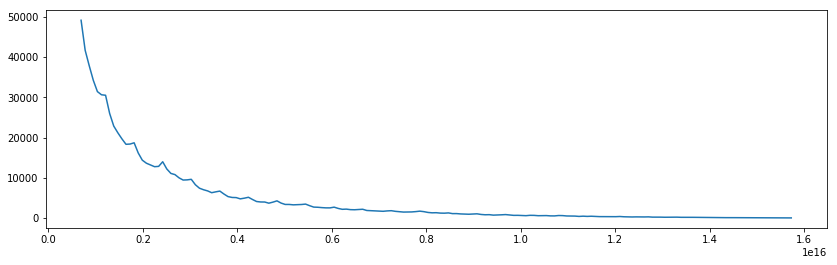

In [135]:
import matplotlib.pyplot as plt 
plt.plot(test.index, test[test<50000])
plt.rcParams['figure.figsize']= (14,4)

In [141]:
# 하루에도 다른 세션ID로 여러번 구매하신 경우가 있을까? 각 클라이언트별 구매날짜횟수와 SESS_ID횟수 비교
a = raw.groupby('CLNT_ID')['SESS_DT'].count()

In [142]:
b =raw.groupby('CLNT_ID')['SESS_ID'].count()

In [144]:
c = b-a

In [145]:
np.mean(c)

0.0